# Function Code

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def draw_schematic(total_depth,
                   objects,
                   objects_top_depths,
                   number_of_zones,
                   zones_names,
                   zone_depths,
                   save_png = False):
    
    """
    Description:
    This function draw well schematic for wells that is equipped with ESP, PCP, Packers, Bridge Plug and tubing.
    It keeps the correct depth ratios to give better imagination about the downhole schematic.
    
    Limitations:
    - It works only in vertical wells.
    - It has limited completion options.
    
    Keywords:
    total_depth : int
        well total depth
    objects : list of specific items
        The downhole components in the well ['Bridge Plug', 'packer', 'ESP', 'PCP']
        Note:
            Make sure that the tubing is connected to the latest element in this list.
            E.g. if the well is natural flow pakcer must be the latest element.
            or if PCP or ESP are installed they should be the latest element.
    objects_top_depths: list of int
        the top depths of the components identified in objects above respectively.
        Note: if the well is natural flow well, make the packer and its top depth the latest element in the two lists above.
    number_of_zones: int
        number of zones to be shown in the schematic
    zones_names: list of string
        list of zones names respectively
    zone_depths: list of int
        list of zones top depths and bottom depths respectively according to zones_names above.
        Note: zone_depths list is doubled in size the list of zones_names, because each zone has its own top and bottom depths
    save_png : boolean
        The default is False
        if Set to True, it will the schematic will be saved to the current directory of the notebook.
    
    Example:
    
    draw_schematic(total_depth = 1550,
               objects = ['Bridge Plug', 'packer'],
               objects_top_depths = [1300, 750],
               number_of_zones = 4,
               zones_names = ['Zone1', 'Zone2', 'Zone3', 'Zone4'],
               zone_depths = [800, 850, 1000, 1030, 1400, 1450, 1330, 1340],
               save_png = True)
    
    """
    
    def draw_zone(top, bottom):
        for i in np.linspace(top,bottom,10):
            ax.axhline(i, color = 'black', xmin = 0.218, xmax = 0.34, lw = 0.4)
            ax.axhline(i, color = 'black', xmin = 0.64, xmax = 0.86, lw = 0.4)
    
    # initiate the graphs
    fig = plt.figure(frameon=False, figsize = (5,10))

    ax = fig.add_subplot(111)

    top_ref = (total_depth - 300)/total_depth

    # Adding casing and surface Level
    ax.axvline(0, color='black', ymax = top_ref)
    ax.axvline(100, color='black', ymax = top_ref)
    ax.axhline(300, color = 'black')


    # Adding objects
    for object_dh, depth in zip(objects, objects_top_depths):
        
        ex1, ex2 = 6, 92
        
        if object_dh == 'Bridge Plug':
            offset = 15
        elif object_dh == 'packer':
            offset = 20
        elif object_dh == 'ESP':
            offset = 50
        elif object_dh == 'PCP':
            offset = 20
        
        #if object_dh in ['Bridge Plug', 'packer']:
           # offset = 80
       # else:
           # offset = 200

        img_path = object_dh + '.png'
        img = mpimg.imread(img_path)
        ax.imshow(img, extent=[ex1, ex2, depth, depth + offset])
        ax.annotate(object_dh, xy =(150, depth), xytext =(150, depth), color = 'blue')

    # Adding object
    img_path = 'wellhead.png'
    img = mpimg.imread(img_path)
    ax.imshow(img, extent=[-48, 158, 300,0])

    # Adding object
    img_path = 'tubing.png'
    img = mpimg.imread(img_path)
    ax.imshow(img, extent=[25, 75, 300, objects_top_depths[-1]])


    # x & y axis adjustments
    ax.set_ylim([0,total_depth+5])
    ax.set_xlim([-120,220])
    ax.invert_yaxis()
    ax.tick_params(axis='x', which='both', length=0, labelbottom=False)
    ax.set_frame_on(False)
    ax.tick_params(axis='y', which='both', left = True, labelbottom=False)
        
    # Putting depths
    objects_top_depths.append(total_depth)
    main_depths = objects_top_depths
    
    plt.yticks(main_depths)

    # Dotted lines for depths
    for depth in main_depths:
        ax.axhline(depth, color = 'blue', ls = '--', xmin = 0, xmax = 0.34, lw = 0.8)

    # Adding perforation
    for j in range(0, number_of_zones*2, 2):
        draw_zone(zone_depths[j], zone_depths[j+1])
    
    k = 0
    for j in range(0, len(zone_depths), 2):
        locate = (zone_depths[j] + zone_depths[j+1]) / 2
        ax.annotate(zones_names[k], xy =(180, locate), xytext =(180, locate), color = 'green')
        k+=1
    
    a = True
    for j in zone_depths:
        if a:
            ax.annotate(str(j), xy =(-90, j), xytext =(-120, j), color = 'crimson')
            a = False
        else:
            ax.annotate(str(j), xy =(-90, j), xytext =(-120, j+20), color = 'crimson')
            a = True
    if save_png:
        plt.savefig('schematic_1.png')
    plt.show()

# Example

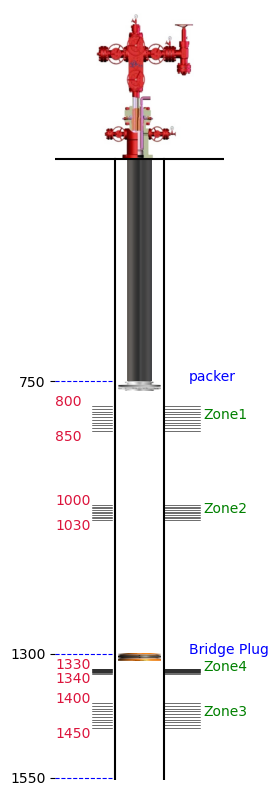

In [55]:
draw_schematic(total_depth = 1550,
               objects = ['Bridge Plug', 'packer'],
               objects_top_depths = [1300, 750],
               number_of_zones = 4,
               zones_names = ['Zone1', 'Zone2', 'Zone3', 'Zone4'],
               zone_depths = [800, 850, 1000, 1030, 1400, 1450, 1330, 1340])